<a href="https://colab.research.google.com/github/aeyjeyaryan/Deep-Learning/blob/main/The%20CNN%20Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
(train_images,train_labels),(test_images,test_labels) = datasets.cifar10.load_data()

In [4]:
# normalizing the pixel value between 0 and 1
train_images, test_images = train_images / 255.0, test_images/255.0

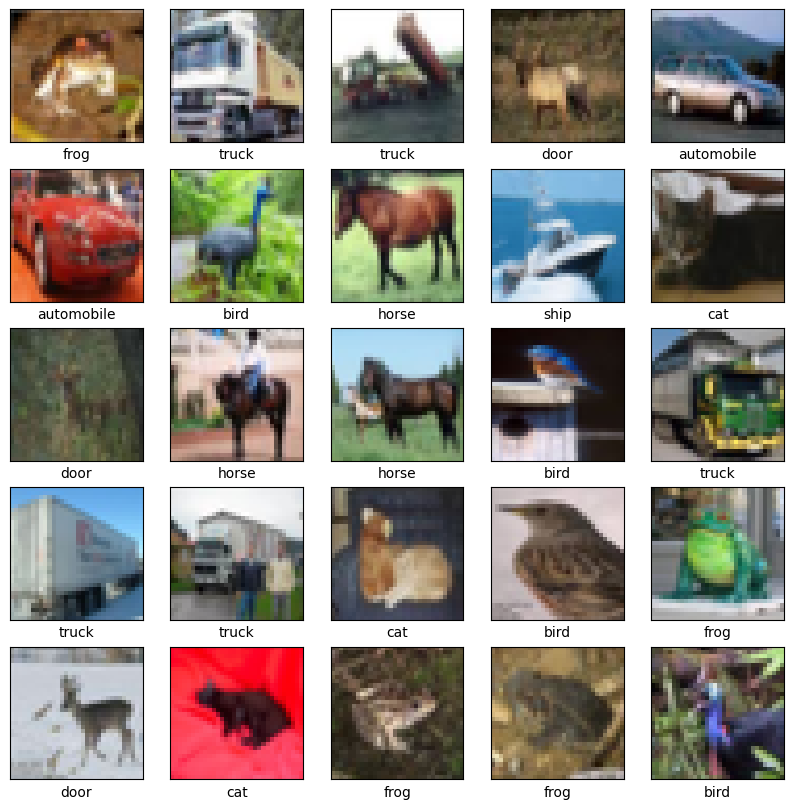

In [8]:
class_names = ['airplane','automobile','bird','cat','door','dog','frog','horse','ship','truck']
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i])
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()


In [10]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))


In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
Total params: 56320 (220.00 KB)
Trainable params: 5632

In [12]:
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)             

In [14]:
# compiling and training the model
model.compile('adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [15]:
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images,test_labels))

Epoch 1/10
1563/1563 [==============================] - 74s 46ms/step - loss: 1.5404 - accuracy: 0.4388 - val_loss: 1.2901 - val_accuracy: 0.5382
Epoch 2/10
1563/1563 [==============================] - 81s 52ms/step - loss: 1.1715 - accuracy: 0.5847 - val_loss: 1.1276 - val_accuracy: 0.5942
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.0262 - accuracy: 0.6374 - val_loss: 0.9980 - val_accuracy: 0.6419
Epoch 4/10
1563/1563 [==============================] - 68s 44ms/step - loss: 0.9224 - accuracy: 0.6750 - val_loss: 0.9626 - val_accuracy: 0.6636
Epoch 5/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8557 - accuracy: 0.6980 - val_loss: 0.9253 - val_accuracy: 0.6781
Epoch 6/10
1563/1563 [==============================] - 68s 43ms/step - loss: 0.7975 - accuracy: 0.7208 - val_loss: 0.9692 - val_accuracy: 0.6670
Epoch 7/10
1563/1563 [==============================] - 67s 43ms/step - loss: 0.7508 - accuracy: 0.7359 - val_loss: 0.8855 -

In [16]:
model.evaluate(test_images, test_labels, verbose=2)

313/313 - 4s - loss: 0.8850 - accuracy: 0.7086 - 4s/epoch - 12ms/step


[0.8850073218345642, 0.7085999846458435]